In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_file_path = 'lab1_train.csv'
test_file_path = 'lab1_test.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')
test_data = pd.read_csv(test_file_path, delimiter=',')


# Convert Timestamp column to datetime
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')


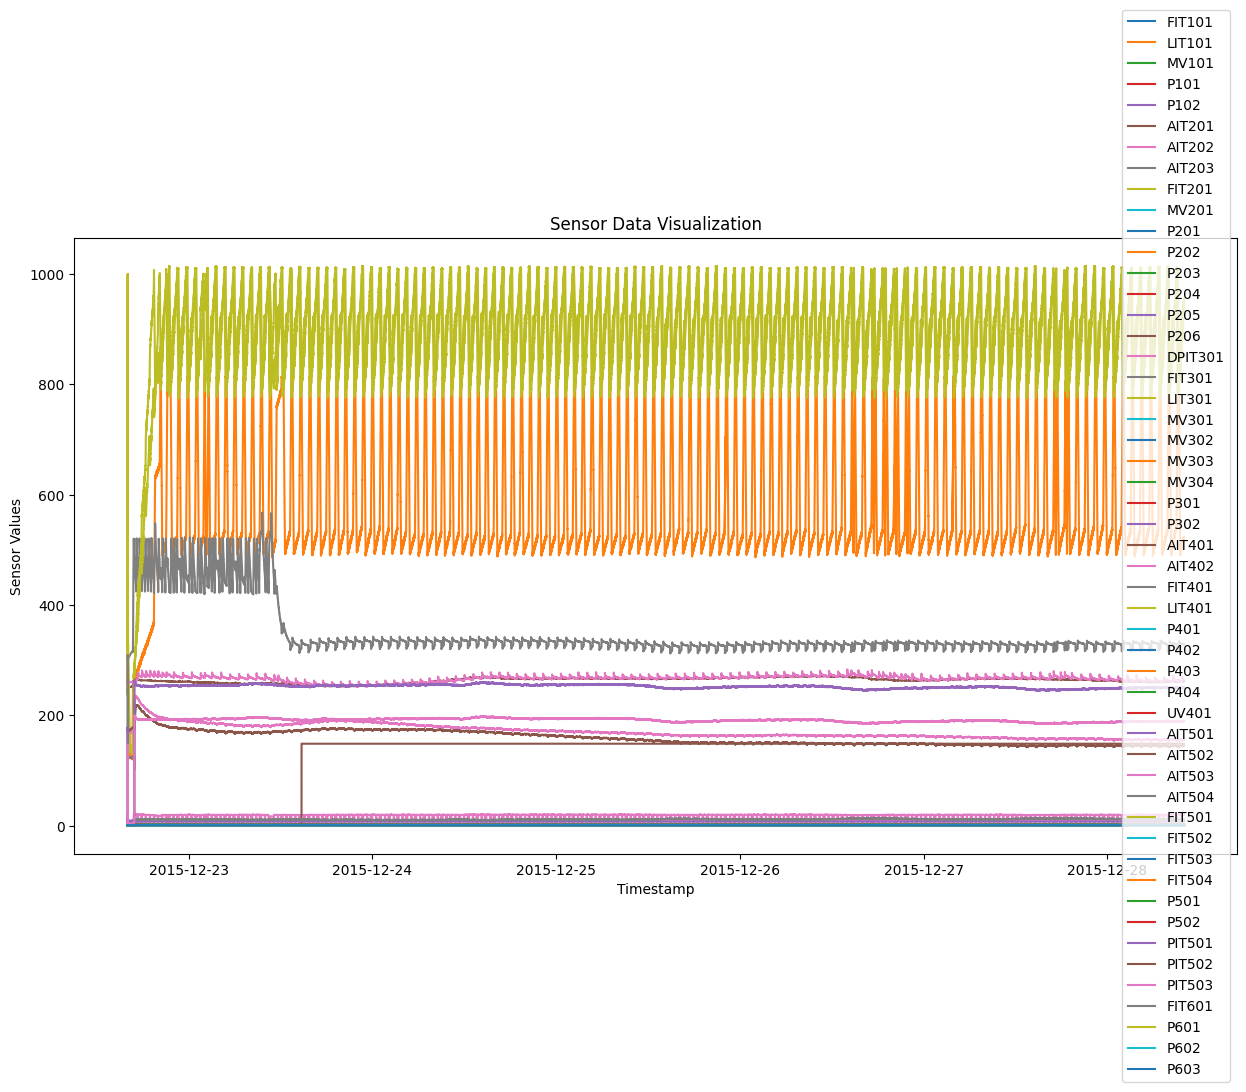

In [5]:
def visualize_sensor_data(df, window=None, sensors=None):
    # If window is None, visualize the entire dataset
    if window is None:
        start_index, end_index = 0, len(df)
    else:
        start_index, end_index = window

    # If sensors is None, select all sensor columns
    if sensors is None:
        sensors = df.columns[1:-1]

    # Plot each sensor in a different color
    plt.figure(figsize=(15, 8))
    for sensor in sensors:
        plt.plot(df['Timestamp'][start_index:end_index], df[sensor][start_index:end_index], label=sensor)

    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Values')
    plt.title('Sensor Data Visualization')
    plt.legend(loc='center right')

    plt.show()

visualize_sensor_data(train_data)

### 1) What type of signals are there?
This dataset includes dynamic signals like LIT101, which shows clear cyclic behavior, with regular oscillations. There are also static signals like AIT401, which remain stable over time with minimal change. 

To find correlated + uncorrelated signals, we will use the correlation matrix, represented as a heatmap below.

In [6]:
train_data.describe()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,496800,496800.000000,496800.00000,496800.000000,496800.000000,496800.0,496800.00000,496800.000000,496800.000000,496800.000000,...,496800.000000,496800.000000,496800.0,496800.000000,496800.000000,496800.000000,496800.000000,496800.0,496800.000000,496800.0
mean,2015-12-25 12:59:59.499999744,1.844964,586.09884,1.718364,1.746860,1.0,263.73899,8.387852,348.230699,1.828534,...,0.306141,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0
min,2015-12-22 16:00:00,0.000000,120.62370,0.000000,1.000000,1.0,244.32840,8.190080,300.845900,0.000000,...,0.000000,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0
25%,2015-12-24 02:29:59.750000128,0.000000,508.24470,1.000000,1.000000,1.0,260.70240,8.349654,327.275100,0.008650,...,0.306633,2.000000,1.0,249.951900,1.057252,188.974000,0.000000,1.0,1.000000,1.0
50%,2015-12-25 12:59:59.500000,2.491112,525.51590,2.000000,2.000000,1.0,265.28450,8.366636,330.940800,2.443085,...,0.308362,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0
75%,2015-12-26 23:29:59.249999872,2.591679,675.85400,2.000000,2.000000,1.0,266.98280,8.407331,335.324300,2.451671,...,0.310284,2.000000,1.0,255.030800,1.217441,193.860500,0.000128,1.0,1.000000,1.0
max,2015-12-28 09:59:59,2.745092,1000.00000,2.000000,2.000000,1.0,272.52630,8.988273,567.469900,2.487938,...,0.317010,2.000000,1.0,264.643700,3.668343,200.637600,1.746131,1.0,2.000000,1.0
std,NaN,1.135332,123.89144,0.458669,0.434811,0.0,4.83595,0.090236,49.422251,1.062482,...,0.025356,0.081694,0.0,19.699763,0.216984,15.286211,0.148666,0.0,0.088612,0.0


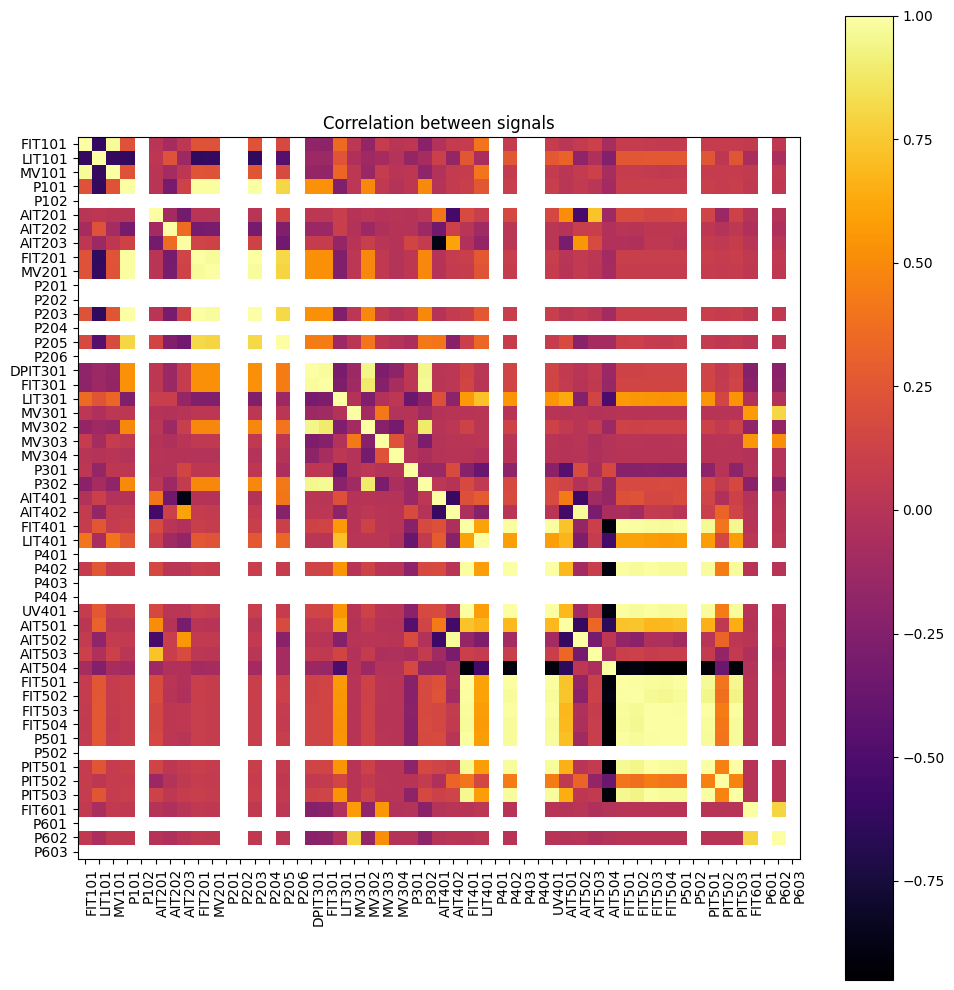

In [7]:
train_df = train_data.copy().drop(columns=['Timestamp', 'Normal/Attack'])
correlation_df = train_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(correlation_df, cmap="inferno")

cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(train_df.columns)), labels=train_df.columns)
ax.set_yticks(np.arange(len(train_df.columns)), labels=train_df.columns)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
        
ax.set_title("Correlation between signals")
fig.tight_layout()
plt.show()

### LIT101: Dynamic + Cyclic, AIT401: Static

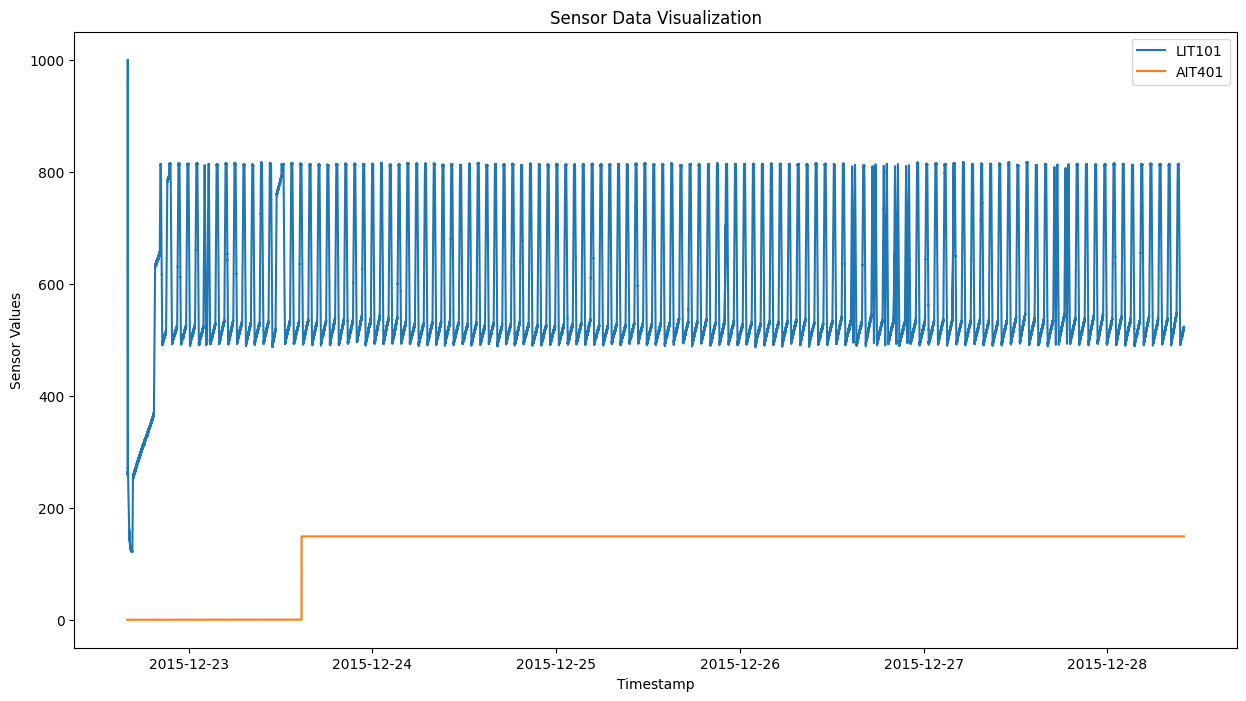

In [ ]:
visualize_sensor_data(train_data, sensors=['LIT101', 'AIT401'])

### Two correlated signals (FIT201, P101).

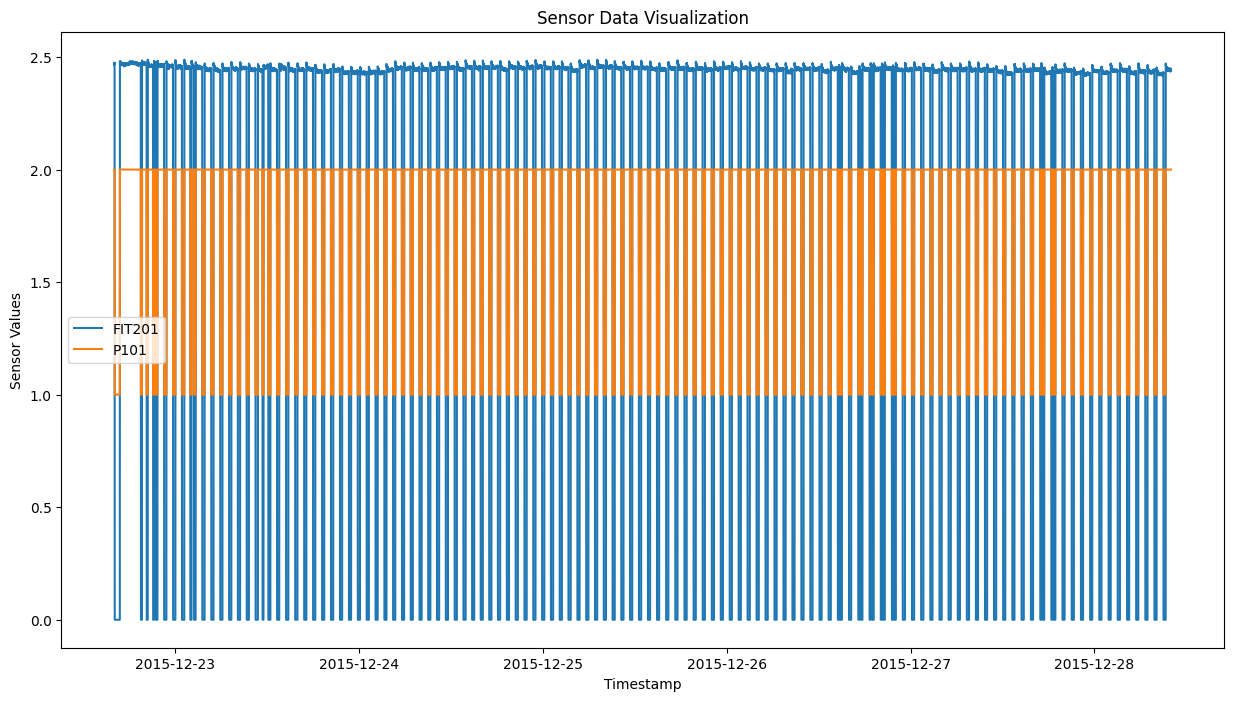

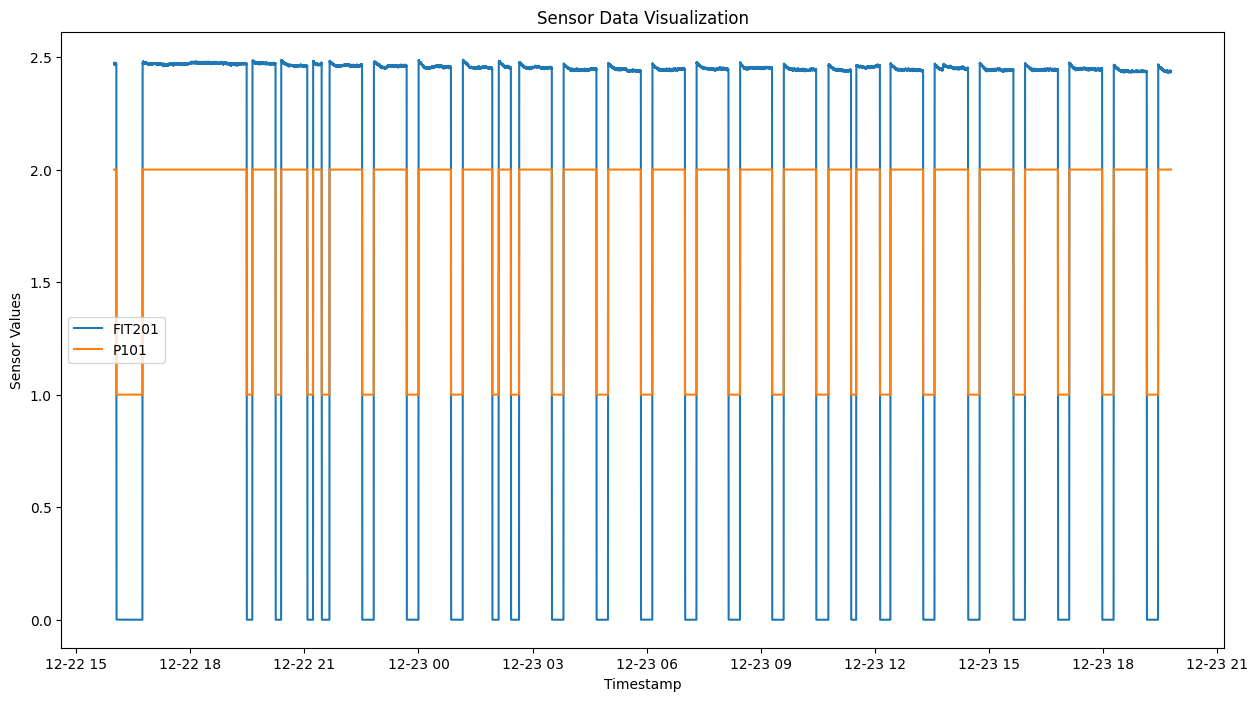

In [8]:
visualize_sensor_data(train_data, sensors=['FIT201','P101'])
visualize_sensor_data(train_data, window=(0, 100000), sensors=['FIT201','P101']) # Choosing a smaller window to inspect closer

### Two uncorrelated signals (AIT203, AIT502).

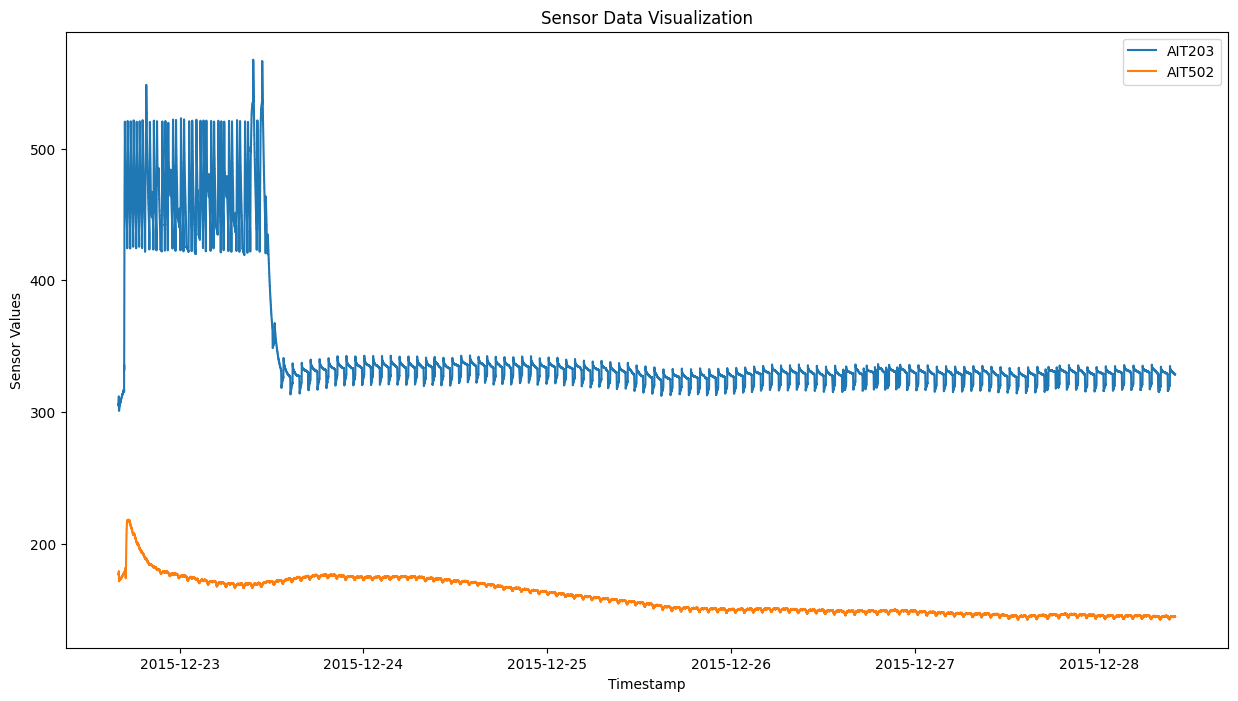

In [9]:
visualize_sensor_data(train_data, sensors=['AIT203','AIT502'])

### 2) Are the signals correlated? Do they show cyclic behavior? 
Yes, as we can see in the examples above, we have found pairs of signals that are highly correlated such as FIT201, P101, which both show strong cyclic behavior and are highly correlated, where all of their changes are alligned with each other's. On the other hand, not all pairs are correlated, as seen in the correlation matrix. For example, AIT203 and P102 are not correlated.

---

# Dynamic Time Warping (DTW)
## Implementation Details
### DTW Algorithm
We have implemented DTW in the following code snippet on the `PIT503` signal, as it has a large, easily detectable anomalous spike in the test dataset.

### Sliding Windows
For the sliding windows, we have chosen non-overlapping windows of size **50**, **100**, and **200**, with a stride equal to the window size.

### Residual Calculation
We calculated the residuals for test windows by finding the minimum DTW distance to their corresponding training windows.

---

## Window Size Analysis
Below is our analysis for each of the above-mentioned window-size choice.

#### Window Size = 50
- **Pros:**
  - Captures fine-grained temporal patterns.
  - Suitable for detecting short-duration anomalies.
- **Cons:**
  - Higher computational cost due to a larger number of windows.
  - May increase false positives in noisy signals.

#### Window Size = 100
- **Pros:**
  - Balances granularity and computational efficiency.
  - Captures mid-length patterns effectively.
- **Cons:**
  - May miss very short-duration anomalies.

#### Window Size = 200
- **Pros:**
  - Reduces computational cost with fewer windows.
  - Suitable for detecting long-duration anomalies.
- **Cons:**
  - May miss short or mid-length anomalies.
  - Less sensitive to local fluctuations.

---

## Visualization of Results
We plotted the residuals for each window size to visually identify anomalies, and have noticed that, due to the large spike of the anomaly in the sensor, and the threshold used by us, all window sizes achieved the same results.



Let's first visualize the train and test sets.

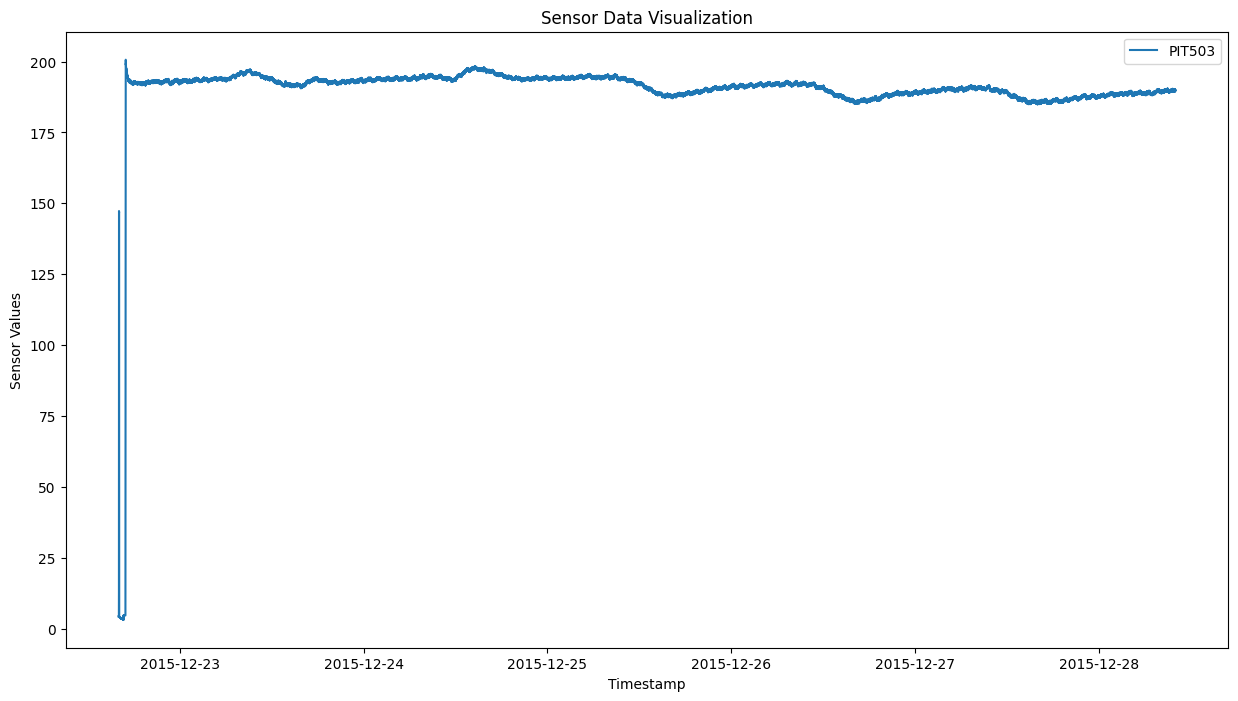

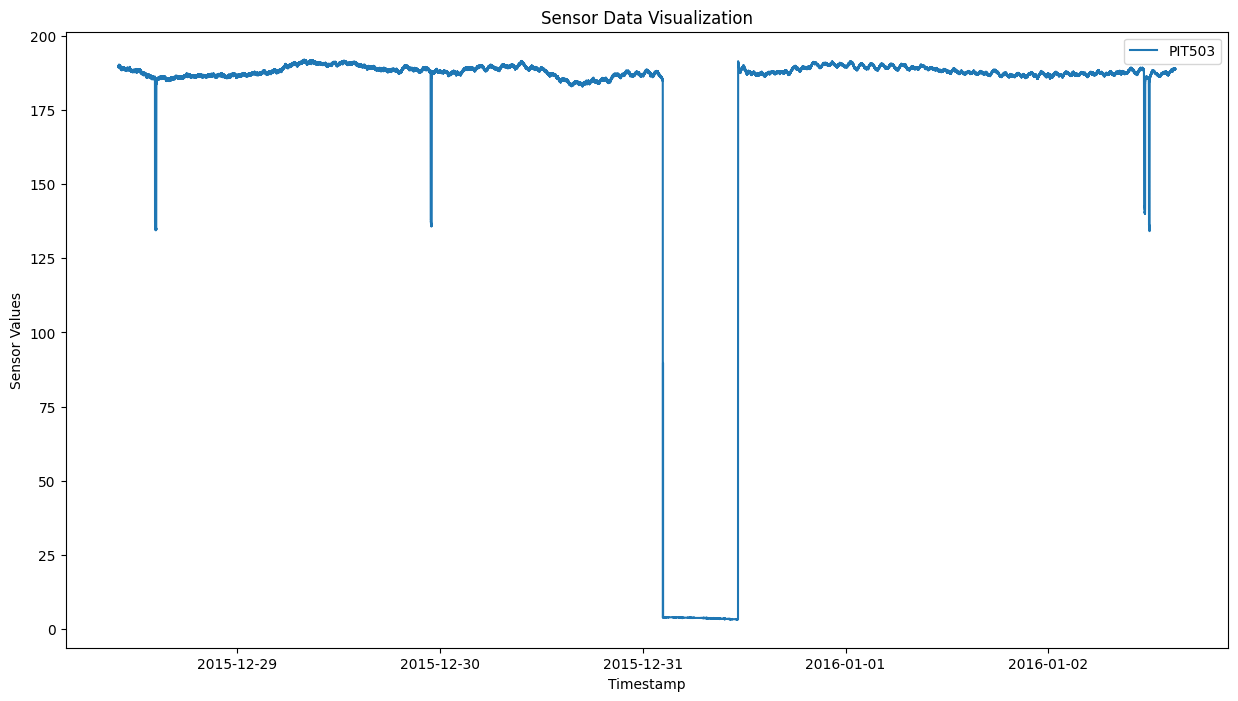

In [10]:
visualize_sensor_data(train_data, sensors=['PIT503'])
visualize_sensor_data(test_data, sensors=['PIT503'])

### Removing anomalous points from the train dataset
As we can see, the begining of the time-series in the training dataset (first picture), seems anomalous, and has no periodic behaviour with that value onwards. Thus, in order to properly detect the anomalies of the test-set, we will remove them explicitly.

As we can see from the graph, we could arrive to the simple conclusion that any threshold above 150 would be suitable to remove the anomalies (we have chosen 185).

In [35]:
def remove_anomalies_by_threshold(data, threshold):
    anomalies = np.where(data < threshold)[0]
    cleaned_data = np.delete(data, anomalies) 
    return cleaned_data, anomalies

dtw_train_data, anomalies = remove_anomalies_by_threshold(train_data['PIT503'], 185)

Let's visualize the cleaned train-set.

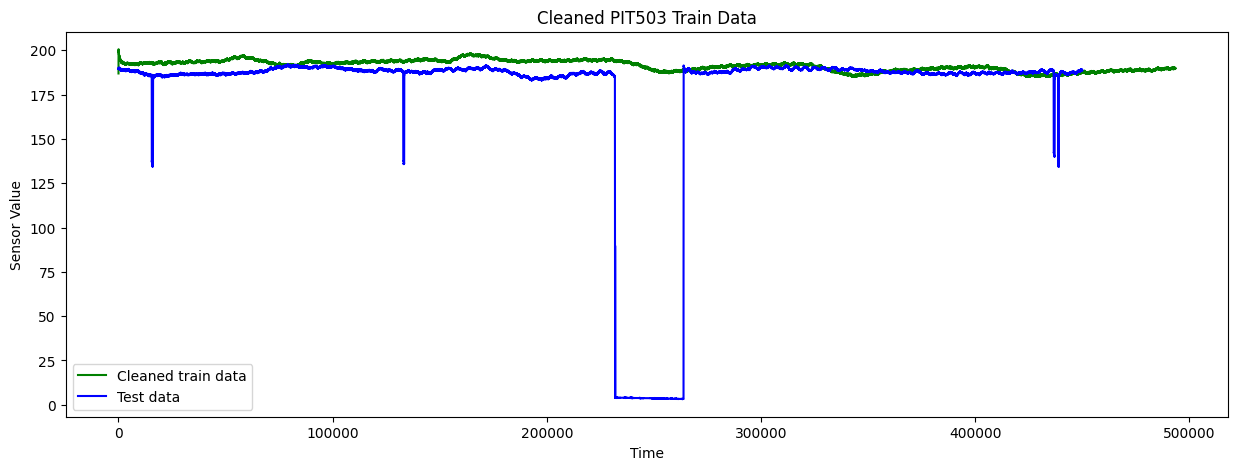

In [50]:
plt.figure(figsize=(15, 5))
plt.plot(dtw_train_data, label='Cleaned train data', color='green')
plt.plot(test_data['PIT503'], label='Test data', color='blue')
plt.legend()
plt.title('Cleaned PIT503 Train Data')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.show()

As we can see, the signal is now in the range [185-200], and we have eliminated the anomalous data instances.

---

### DTW Implementation

Processing window size: 50
Processing window size: 100
Processing window size: 200


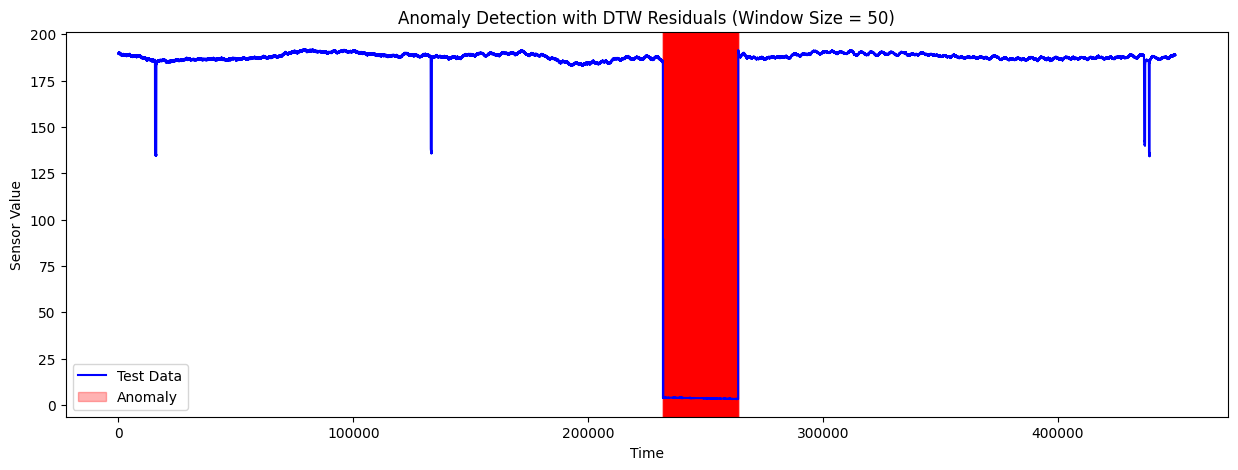

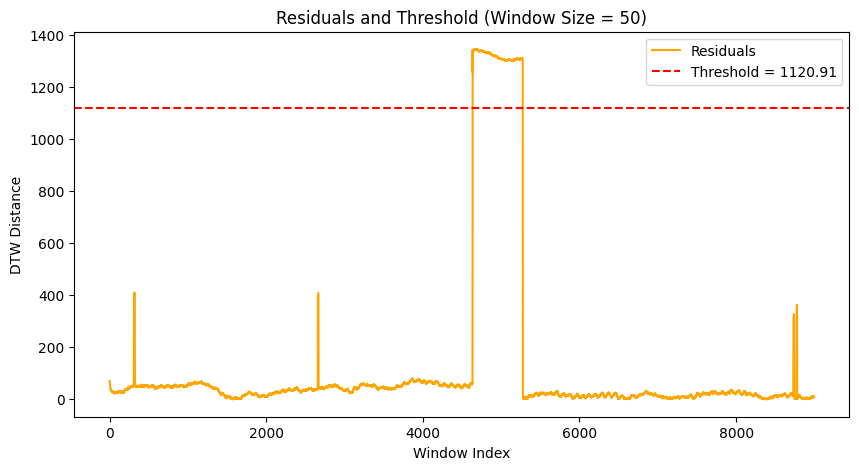

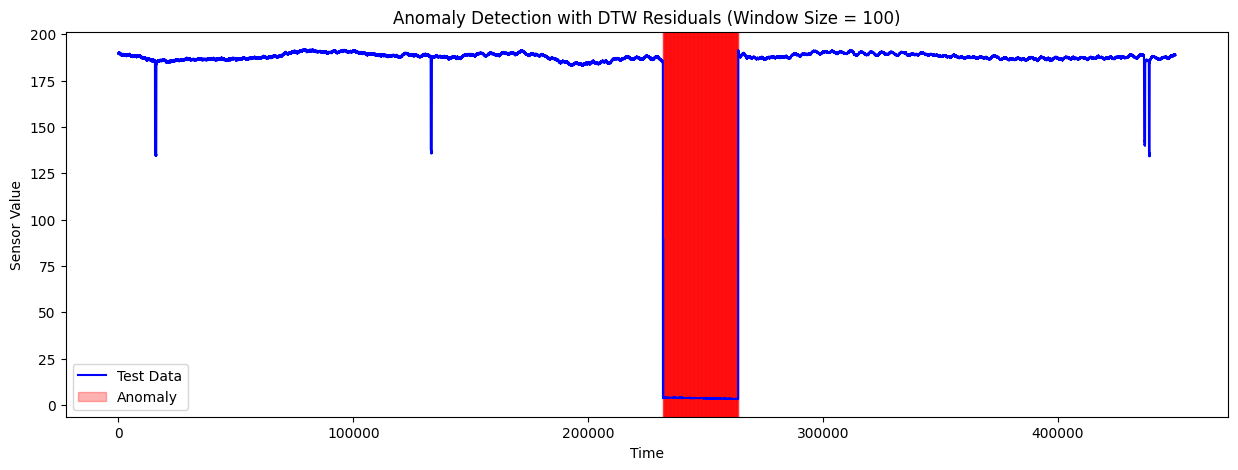

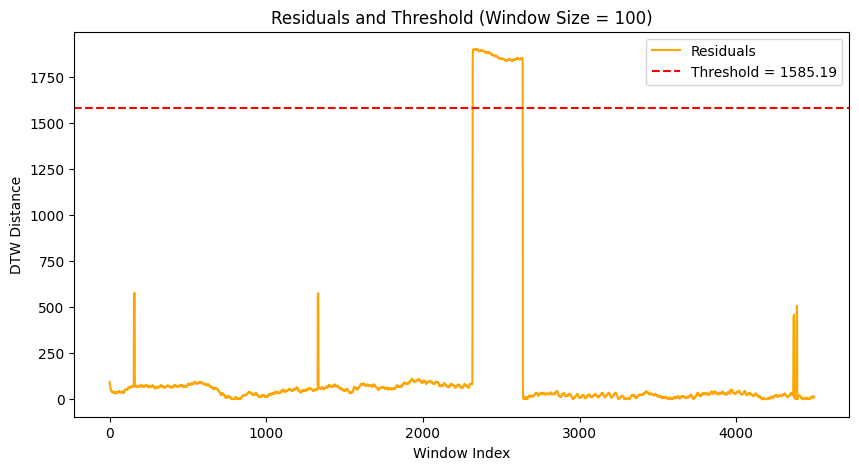

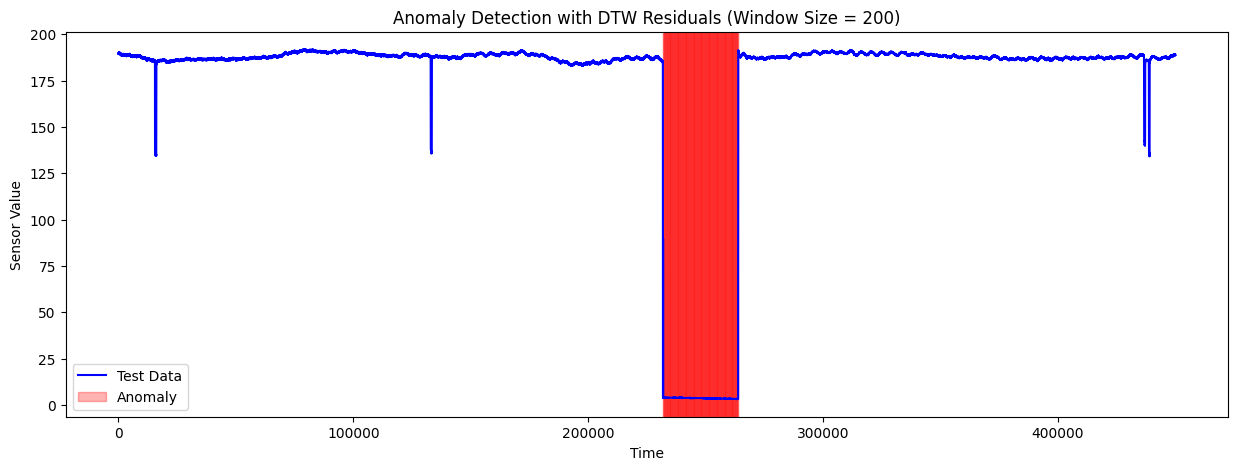

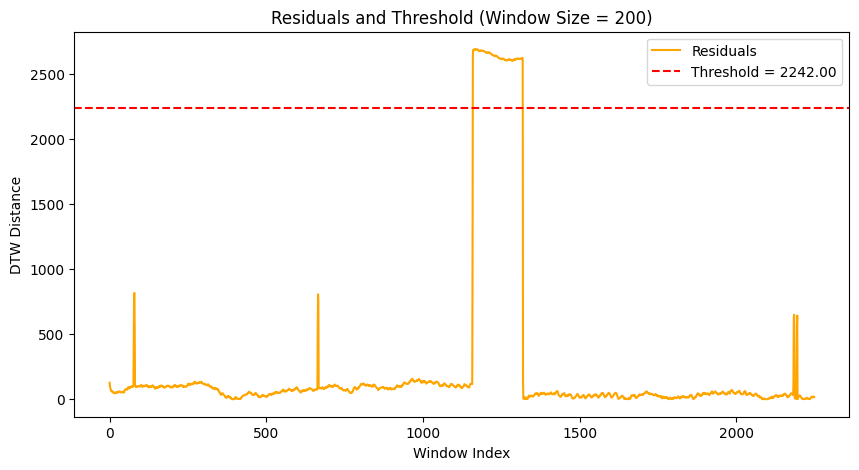

In [ ]:
def dynamic_time_warping(a, b):
    """
    Computing the DTW distance between series 'a' and 'b'.
    """
    n = a.size
    m = b.size
    dtw_distance = np.inf
    dist_mat = np.zeros((n + 1, m + 1))
    for row in range(1, n + 1):
        for col in range(1, m + 1):
            dist_mat[row, col] = (a[row - 1] - b[col - 1])**2
    dist_mat[1:, 0] = np.inf
    dist_mat[0, 1:] = np.inf

    dist_mat2 = np.zeros((n + 1, m + 1))
    dist_mat2[1:, 0] = np.inf
    dist_mat2[0, 1:] = np.inf

    for row in range(1, n + 1):
        for col in range(1, m + 1):
            dist_mat2[row, col] = (a[row - 1] - b[col - 1])**2 + np.min([
                dist_mat2[row - 1, col - 1],
                dist_mat2[row - 1, col],
                dist_mat2[row, col - 1]
            ])
    dtw_distance = np.sqrt(dist_mat2[n, m])
    return dtw_distance

def windowed_data(data, window_size):
    """
    Sliding window function.
    """
    num_windows = len(data) // window_size
    return data[:num_windows * window_size].reshape((num_windows, window_size))

def calculate_residuals(train_windows, test_windows):
    """
    Computing residuals between the train and test windows.
    """
    num_windows = min(train_windows.shape[0], test_windows.shape[0])
    residuals = np.zeros(num_windows)
    for i in range(num_windows):
        residuals[i] = dynamic_time_warping(train_windows[i], test_windows[i])
    return residuals

def detect_anomalies(residuals, threshold):
    """
    Detecting anomalies.
    """
    anomalies = np.where(residuals > threshold)[0]
    return anomalies

def compute_threshold(residuals, scaling_factor=3):
    """
    Computing threshold based on three standard deviations from the mean
    """
    mean = np.mean(residuals)
    std_dev = np.std(residuals)
    threshold = mean + scaling_factor * std_dev
    return threshold

window_sizes = [50, 100, 200]
scaling_factor = 3
results = {}

# Main loop for different window sizes
for window_size in window_sizes:
    print(f"Processing window size: {window_size}")
    
    # Windowing
    train_windows = windowed_data(dtw_train_data, window_size)
    test_windows = windowed_data(test_data['PIT503'].to_numpy(), window_size)
    
    # Calculate residuals
    residuals = calculate_residuals(train_windows, test_windows)
    
    # Compute threshold
    threshold = compute_threshold(residuals, scaling_factor)
    
    # Detect anomalies
    anomalies = detect_anomalies(residuals, threshold)
    
    # Store results
    results[window_size] = {
        'residuals': residuals,
        'threshold': threshold,
        'anomalies': anomalies
    }

# Visualize results for each window size
for window_size in window_sizes:
    residuals = results[window_size]['residuals']
    threshold = results[window_size]['threshold']
    anomalies = results[window_size]['anomalies']
    
    # Plot test data with anomalies
    plt.figure(figsize=(15, 5))
    plt.plot(test_data['PIT503'].to_numpy(), label='Test Data', color='blue')
    for anomaly in anomalies:
        start = anomaly * window_size
        end = start + window_size
        plt.axvspan(start, end, color='red', alpha=0.3, label='Anomaly' if anomaly == anomalies[0] else "")
    plt.legend()
    plt.title(f'Anomaly Detection with DTW Residuals (Window Size = {window_size})')
    plt.xlabel('Time')
    plt.ylabel('Sensor Value')
    plt.show()
    
    # Plot residuals with threshold
    plt.figure(figsize=(10, 5))
    plt.plot(residuals, label='Residuals', color='orange')
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')
    plt.legend()
    plt.title(f'Residuals and Threshold (Window Size = {window_size})')
    plt.xlabel('Window Index')
    plt.ylabel('DTW Distance')
    plt.show()

## Results
As we can see, the DTW seems to capture the anomaly well with all the selected window functions. The ocasional spikes seem not to alert the algorithm, since they seem quite periodic, and the deteced anomaly is of a higher magnitude and longer time window. Thus, the DTW gets the job done well!

---

# PCA for Anomaly Detection

## Overview
Principal Component Analysis (PCA) was applied to the training and test datasets to reduce dimensionality and identify anomalies. By projecting data onto fewer components, we reconstructed the original data and calculated residuals (L2 norm (Euclidian distance) - "Data Mining - The Textbook (page 67)") to measure the deviation between the original and reconstructed values.

Residuals were analyzed across different numbers of components to understand the trade-offs between dimensionality reduction and anomaly detection.

---

In order to check the model's performance, we have applied PCA using 2, 5, 10, 15, 20 components, and then analyzed the results.




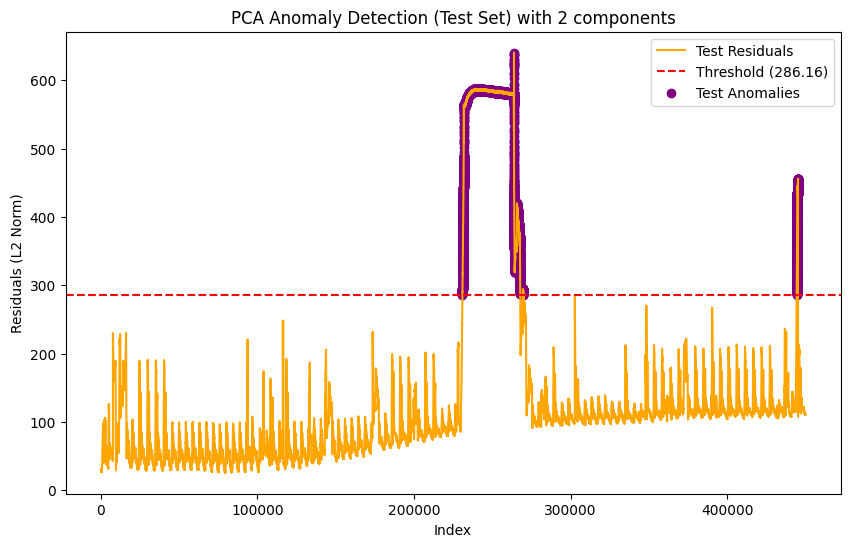

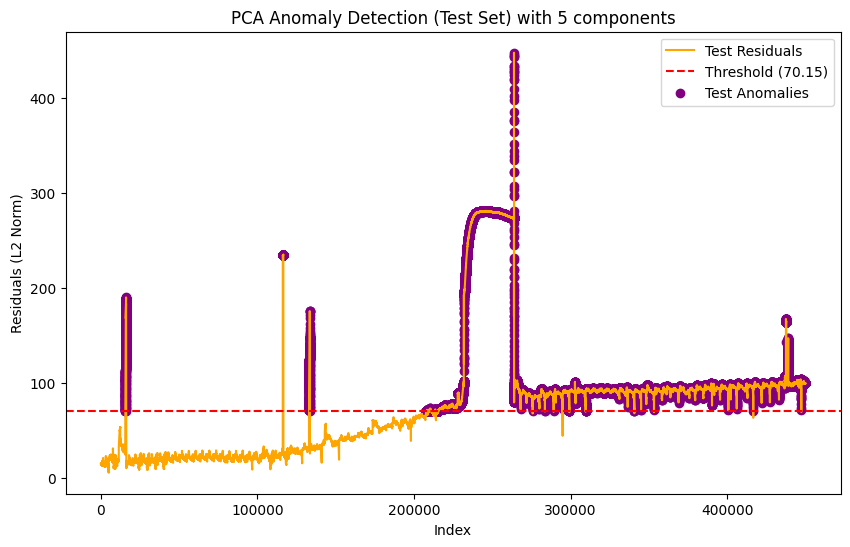

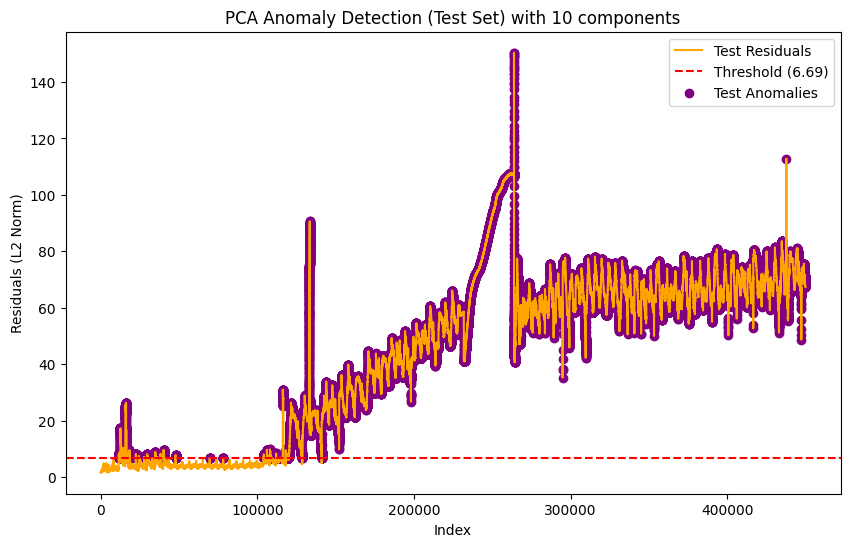

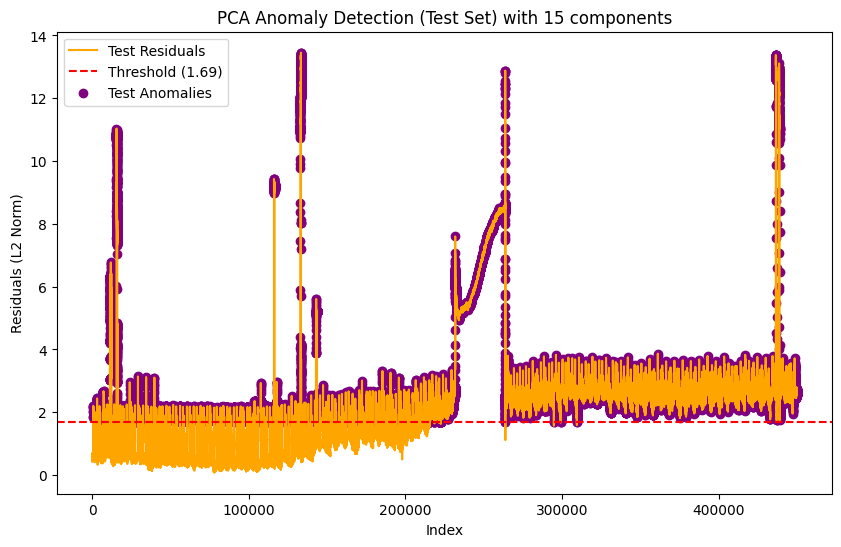

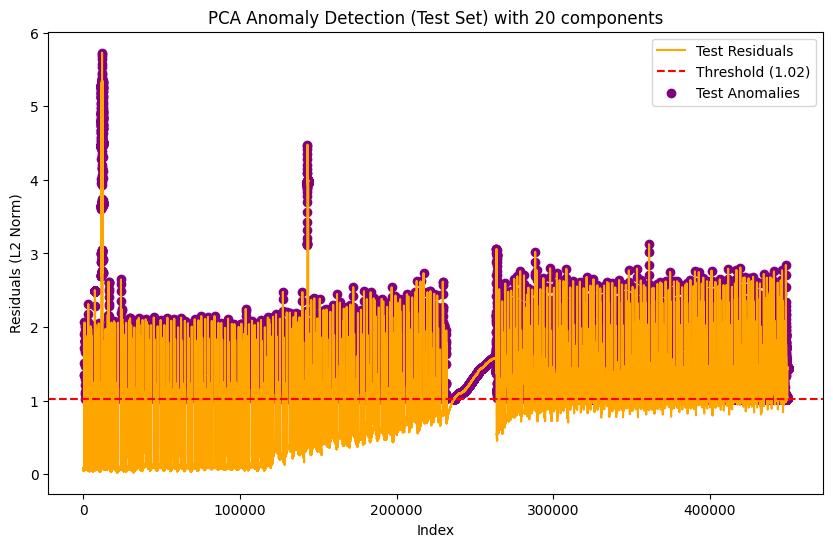

In [ ]:
def principal_component_analysis(df, k):
    """
    Performs PCA on the data and returns the top-k eigenvectors.
    """
    np_df = np.array(df)
    mean = np.mean(np_df, axis=0)
    centered_data = np_df - mean
    covariance_matrix = np.cov(centered_data.T)
    eigenvalues, eigenvectors_all = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors_all[:, sorted_indices[:k]]
    return eigenvectors, mean

def apply_principal_component_analysis(data, eigenvectors, mean):
    """
    Projects the data onto the principal components.
    """
    centered_data = data - mean
    projected_data = np.dot(centered_data, eigenvectors)
    return projected_data

def reconstruct_data(projected_data, eigenvectors, mean):
    """
    Reconstructs the data from the projected data and eigenvectors.
    """
    reconstructed_data = np.dot(projected_data, eigenvectors.T) + mean
    return reconstructed_data

def compute_residuals(original_data, reconstructed_data):
    """
    Computes the residuals as the L2 norm of the reconstruction error.
    """
    residuals = np.linalg.norm(original_data - reconstructed_data, axis=1)
    return residuals

def detect_anomalies(residuals, scaling_factor=3):
    """
    Detects anomalies based on residuals exceeding a threshold.
    """
    threshold = np.mean(residuals) + scaling_factor * np.std(residuals)
    anomalies = np.where(residuals > threshold)[0]
    return anomalies, threshold

train_df = pd.read_csv("lab1_train.csv").select_dtypes(include=[np.number])
test_df = pd.read_csv("lab1_test.csv").select_dtypes(include=[np.number])

train_data = train_df.values
test_data = test_df.values

# Amount of components
components = [2, 5, 10, 15, 20]
for k in components:
    # Training phase: learn PCA on the train set
    eigenvectors, train_mean = principal_component_analysis(train_df, k)

    # Apply PCA to the train set
    train_projected = apply_principal_component_analysis(train_data, eigenvectors, train_mean)
    train_reconstructed = reconstruct_data(train_projected, eigenvectors, train_mean)
    train_residuals = compute_residuals(train_data, train_reconstructed)

    # Compute threshold from train residuals - this time we use 4 std. from the mean since 3 std. seemed a bit too sensitive
    train_threshold = np.mean(train_residuals) + 4 * np.std(train_residuals)

    # Testing phase: apply PCA to the test set
    test_projected = apply_principal_component_analysis(test_data, eigenvectors, train_mean)
    test_reconstructed = reconstruct_data(test_projected, eigenvectors, train_mean)
    test_residuals = compute_residuals(test_data, test_reconstructed)

    # Detect anomalies in the test set using the threshold
    test_anomalies = np.where(test_residuals > train_threshold)[0]

    # Visualize residuals and anomalies
    plt.figure(figsize=(10, 6))
    plt.plot(test_residuals, label="Test Residuals", color="orange")
    plt.axhline(y=train_threshold, color="red", linestyle="--", label=f"Threshold ({train_threshold:.2f})")
    plt.scatter(test_anomalies, test_residuals[test_anomalies], color="purple", label="Test Anomalies")
    plt.xlabel("Index")
    plt.ylabel("Residuals (L2 Norm)")
    plt.title(f"PCA Anomaly Detection (Test Set) with {k} components")
    plt.legend()
    plt.show()

---
## Results
- For this dataset, **2 components** provide a good balance between dimensionality reduction and anomaly sensitivity. As we increase the amount of components, the anomaly detection becomes more and more sensitive, more false-positives starting to appear.